## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [87]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from palmerpenguins import load_penguins
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc,roc_auc_score
import plotnine as pt
from sklearn.linear_model import LogisticRegression

In [88]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [120]:
heart['diagnosis'] = heart['diagnosis'].map({'Disease':1, 'No Disease':0})
X = heart.drop("diagnosis", axis = 1)
y = heart["diagnosis"]


In [90]:
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age",  "chol"])
  ],
  remainder = "drop"
)
# Logistic regression pipeline
logreg_pipeline = Pipeline([
    ('preprocessor', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model on training data
logreg_model = logreg_pipeline.fit(X, y)



In [91]:
age = 55
max = heart['chol'].max()
min = heart['chol'].min()
cholesterol = np.arange(min, 3000, 20)

df_predict = pd.DataFrame({
    'age': age,
    'chol': cholesterol
})

df_predict['heart_disease_prob'] = logreg_pipeline.predict_proba(df_predict)[:, 0] 
#df_predict['heart_disease_prediction'] = logreg_pipeline.predict(df_predict)
df_predict.head()

,age,chol,heart_disease_prob
0,55,126,0.392376
1,55,146,0.401036
2,55,166,0.409758
3,55,186,0.418538
4,55,206,0.427369


In [92]:
df_predict[(df_predict['heart_disease_prob'] < 0.51) & (df_predict['heart_disease_prob'] > 0.49)]

,age,chol,heart_disease_prob
11,55,346,0.490178
12,55,366,0.499223
13,55,386,0.508269


In [93]:
df_predict[(df_predict['heart_disease_prob'] < 0.91) & (df_predict['heart_disease_prob'] > 0.89)]


,age,chol,heart_disease_prob
70,55,1526,0.890481
71,55,1546,0.893960
72,55,1566,0.897342
73,55,1586,0.900628
74,55,1606,0.903819
75,55,1626,0.906919
76,55,1646,0.909929


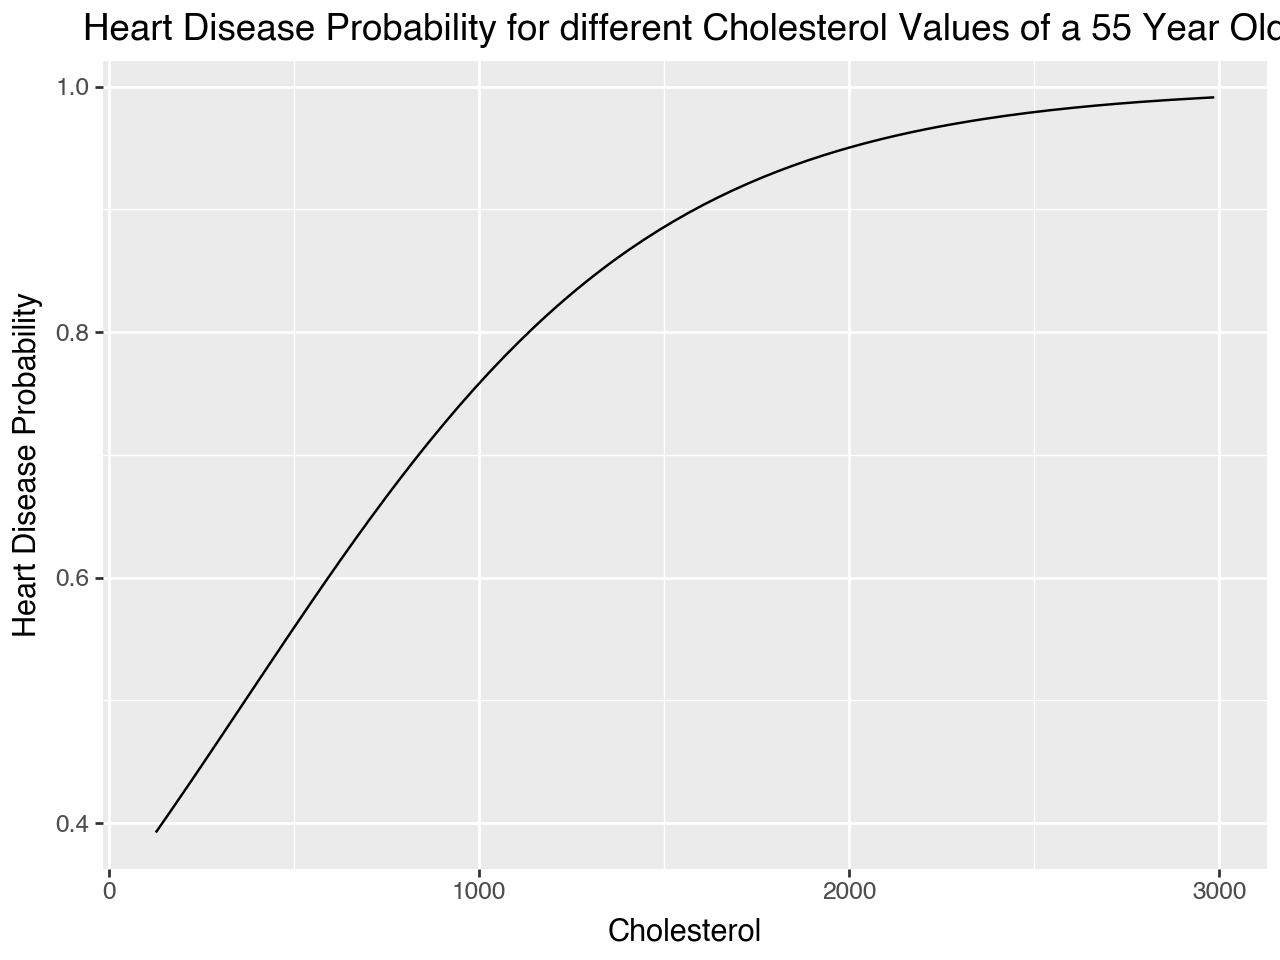

In [94]:
(pt.ggplot(df_predict,pt.aes(x='chol', y='heart_disease_prob'))
 + pt.geom_line()
 + pt.labs(x="Cholesterol",
           y = "Heart Disease Probability",
           title = "Heart Disease Probability for different Cholesterol Values of a 55 Year Old"))

Here, we can see the probability is 0.5 around a cholesterol value of 366 and it is 0.9 at a cholesterol value of around 1586. This means for a 55 year old, a cholesterol value of above 360 would lead to a prediction of heart disease and a cholesterol value of 1586 would lead to a 90% chance of heart disease.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

# Define the pipeline with preprocessing and LDA
lda_pipeline = Pipeline([
    ('preprocessor', ct),  # Preprocessing (e.g., ColumnTransformer for scaling/encoding)
    ('lda', LinearDiscriminantAnalysis())
])

# Fit the LDA model on training data
lda_model = lda_pipeline.fit(X, y)

In [96]:
age = 55
max = heart['chol'].max()
min = heart['chol'].min()
cholesterol = np.arange(min, 3000, 10)

df_predict1 = pd.DataFrame({
    'age': age,
    'chol': cholesterol
})

df_predict1['heart_disease_prob'] = lda_pipeline.predict_proba(df_predict1)[:, 0] 
#df_predict['heart_disease_prediction'] = logreg_pipeline.predict(df_predict)
df_predict1.head()

,age,chol,heart_disease_prob
0,55,126,0.393286
1,55,136,0.397564
2,55,146,0.401859
3,55,156,0.406168
4,55,166,0.410491


In [97]:
df_predict1[(df_predict1['heart_disease_prob'] < 0.51) & (df_predict1['heart_disease_prob'] > 0.49)]

,age,chol,heart_disease_prob
22,55,346,0.490053
23,55,356,0.494526
24,55,366,0.499000
25,55,376,0.503474
26,55,386,0.507948


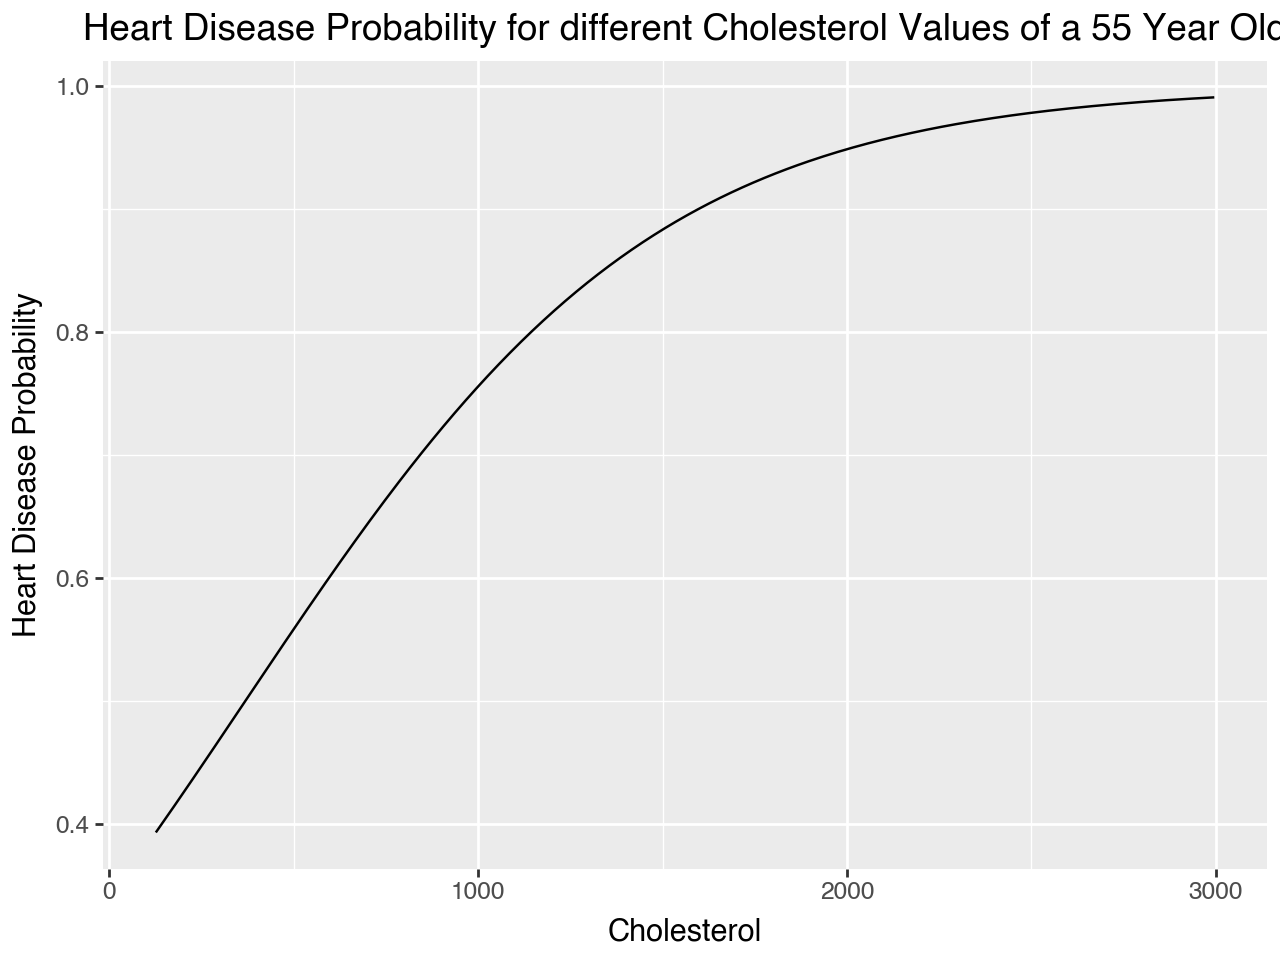

In [98]:
(pt.ggplot(df_predict1,pt.aes(x='chol', y='heart_disease_prob'))
 + pt.geom_line()
 + pt.labs(x="Cholesterol",
           y = "Heart Disease Probability",
           title = "Heart Disease Probability for different Cholesterol Values of a 55 Year Old"))

Here, the cholesterol value for a prediction of heart disease is around 370.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [138]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the pipeline with preprocessing and SVC
svc_pipeline = Pipeline([
    ('preprocessor', ct),  # Preprocessing (e.g., ColumnTransformer for scaling/encoding)
    ('svc', SVC(probability=True, kernel='linear', random_state=42))  # Enable probability estimation
])

# Fit the SVC model on training data
svc_model = svc_pipeline.fit(X, y)

In [100]:
age = 55
max = heart['chol'].max()
min = heart['chol'].min()
cholesterol = np.arange(min, 3000, 10)

df_predict1 = pd.DataFrame({
    'age': age,
    'chol': cholesterol
})

df_predict1['heart_disease_prob'] = svc_pipeline.predict_proba(df_predict1)[:, 0] 
#df_predict['heart_disease_prediction'] = logreg_pipeline.predict(df_predict)
df_predict1.head()

,age,chol,heart_disease_prob
0,55,126,0.360859
1,55,136,0.361045
2,55,146,0.360199
3,55,156,0.358408
4,55,166,0.356439


In [101]:
df_predict1[(df_predict1['heart_disease_prob'] < 0.51) & (df_predict1['heart_disease_prob'] > 0.49)]

,age,chol,heart_disease_prob
13,55,256,0.5
18,55,306,0.5


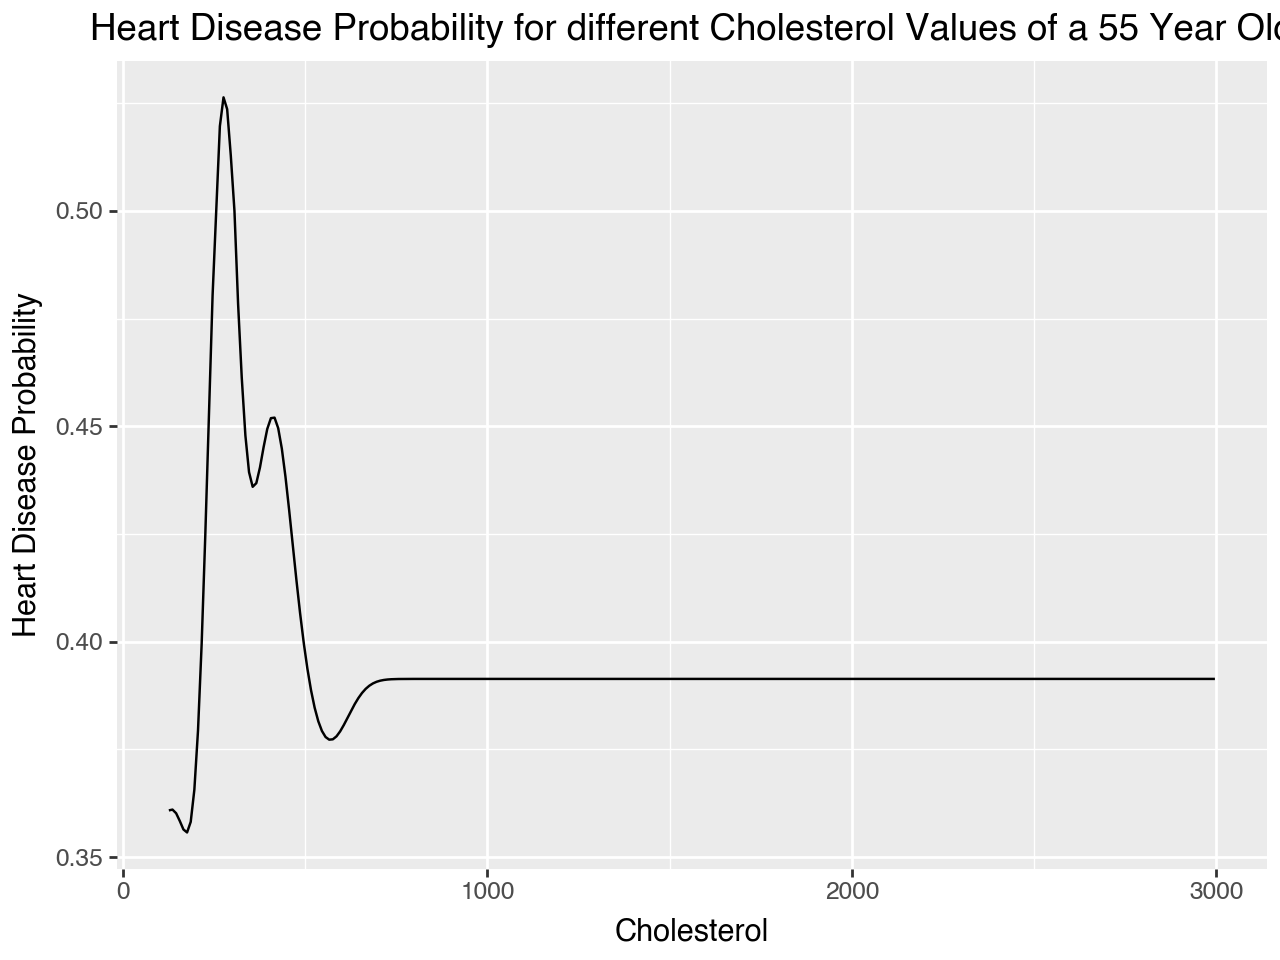

In [102]:
(pt.ggplot(df_predict1,pt.aes(x='chol', y='heart_disease_prob'))
 + pt.geom_line()
 + pt.labs(x="Cholesterol",
           y = "Heart Disease Probability",
           title = "Heart Disease Probability for different Cholesterol Values of a 55 Year Old"))

Now, we have a cholesterol value of between 256 and 306 that will lead to a probability of over 0.5 of heart disease.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

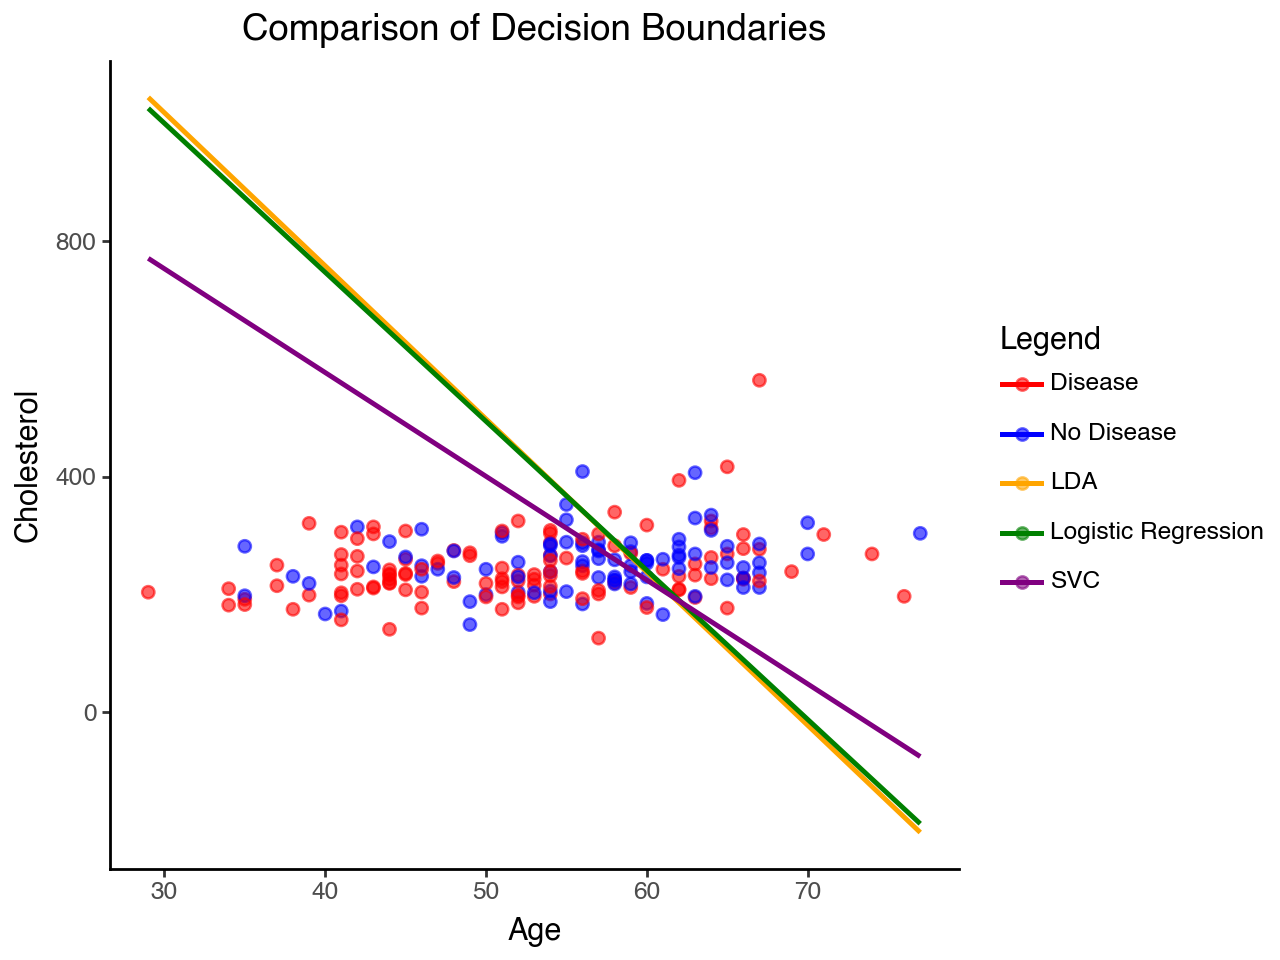

In [ ]:
plot_data = X.copy()
plot_data['true_outcome'] = y

# Convert 'true_outcome' to categorical (discrete)
plot_data['true_outcome'] = plot_data['true_outcome'].map({0: 'No Disease', 1: 'Disease'})

# Extract scaling parameters from the preprocessor pipeline
scaler = logreg_model.named_steps['preprocessor'].named_transformers_['standardize']
age_mean, age_scale = scaler.mean_[0], scaler.scale_[0] 
chol_mean, chol_scale = scaler.mean_[1], scaler.scale_[1] 

# Generate age range for decision boundaries
age_range = np.linspace(X['age'].min(), X['age'].max(), 500)

# Logistic Regression decision boundary (Unscale coefficients)
logreg = logreg_model.named_steps['logreg'] 
b0_log = logreg.intercept_[0]
b1_log, b2_log = logreg.coef_[0] 
b1_log_unscaled = b1_log / age_scale
b2_log_unscaled = b2_log / chol_scale
b0_log_unscaled = b0_log - b1_log_unscaled * age_mean - b2_log_unscaled * chol_mean

chol_log = -(b0_log_unscaled + b1_log_unscaled * age_range) / b2_log_unscaled
log_boundary = pd.DataFrame({'age': age_range, 'chol': chol_log, 'model': 'Logistic Regression'})

# LDA decision boundary (Unscale coefficients)
lda = lda_model.named_steps['lda']  # Access the LDA model from the pipeline
b0_lda = lda.intercept_[0]
b1_lda, b2_lda = lda.coef_[0]
b1_lda_unscaled = b1_lda / age_scale
b2_lda_unscaled = b2_lda / chol_scale
b0_lda_unscaled = b0_lda - b1_lda_unscaled * age_mean - b2_lda_unscaled * chol_mean

chol_lda = -(b0_lda_unscaled + b1_lda_unscaled * age_range) / b2_lda_unscaled
lda_boundary = pd.DataFrame({'age': age_range, 'chol': chol_lda, 'model': 'LDA'})

# SVC decision boundary (Unscale coefficients)
svc = svc_model.named_steps['svc']  # Access the SVC model from the pipeline
b0_svc = svc.intercept_[0]
b1_svc, b2_svc = svc.coef_[0]
b1_svc_unscaled = b1_svc / age_scale
b2_svc_unscaled = b2_svc / chol_scale
b0_svc_unscaled = b0_svc - b1_svc_unscaled * age_mean - b2_svc_unscaled * chol_mean

chol_svc = -(b0_svc_unscaled + b1_svc_unscaled * age_range) / b2_svc_unscaled
svc_boundary = pd.DataFrame({'age': age_range, 'chol': chol_svc, 'model': 'SVC'})

# Combine decision boundaries into one DataFrame
boundaries = pd.concat([log_boundary, lda_boundary, svc_boundary])

# Create the plot
(
pt.ggplot(plot_data, pt.aes(x='age', y='chol', color='true_outcome')) +
pt.geom_point(alpha=0.6, size=2) +  # Scatter plot with true outcomes
pt.geom_line(boundaries, pt.aes(x='age', y='chol', color='model'), size=1) +  # Decision boundaries
pt.scale_color_manual(
    values={'No Disease': 'blue', 'Disease': 'red', 'Logistic Regression': 'green', 'LDA': 'orange', 'SVC': 'purple'},
    name="Legend"
) +
pt.labs(
    title="Comparison of Decision Boundaries",
    x="Age",
    y="Cholesterol"
) +
pt.theme_classic()
)


Here, we can see the LDA and Logistic Regression are very similar, and the SVC is a little bit different from the others. It shows an overlay of the predictions and the actual boundaries with the upper right side of the graph being classified as heart disease.